## Personal Project using NYC Open Data

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [159]:
# keep in mind that this set has been renewed and a lot of the records have been stored away
url = 'https://data.cityofnewyork.us/resource/jb7j-dtam.csv'

deaths_df = pd.read_csv(url)

In [160]:
deaths_df.head()

,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
0,2017,All Other Causes,Female,Not Stated/Unknown,99,NaN,NaN
1,2017,Malignant Neoplasms (Cancer: C00-C97),Female,Other Race/ Ethnicity,16,NaN,NaN
2,2017,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",Female,Other Race/ Ethnicity,13,NaN,NaN
3,2017,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",Male,Other Race/ Ethnicity,21,NaN,NaN
4,2017,Mental and Behavioral Disorders due to Acciden...,Female,Other Race/ Ethnicity,3,NaN,NaN


In [161]:
deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
year                       1000 non-null int64
leading_cause              1000 non-null object
sex                        1000 non-null object
race_ethnicity             1000 non-null object
deaths                     1000 non-null object
death_rate                 843 non-null object
age_adjusted_death_rate    843 non-null object
dtypes: int64(1), object(6)
memory usage: 54.8+ KB


In [162]:
# dropping any rows that have ANY NULLS for values 
#deaths_df.dropna(how = 'any', inplace = True)

In [163]:
#deaths_df.info()

## converting dtype to necessary columns

In [164]:
deaths_df['leading_cause'].value_counts()

deaths_df['leading_cause'] = deaths_df['leading_cause'].astype('category')

In [165]:
deaths_df['race_ethnicity'] = deaths_df['race_ethnicity'].astype('category')

In [166]:
deaths_df['year'] = deaths_df['year'].astype('category')

In [167]:
deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
year                       1000 non-null category
leading_cause              1000 non-null category
sex                        1000 non-null object
race_ethnicity             1000 non-null category
deaths                     1000 non-null object
death_rate                 843 non-null object
age_adjusted_death_rate    843 non-null object
dtypes: category(3), object(4)
memory usage: 36.6+ KB


## Analysis

In [168]:
deaths_df['year'].value_counts()

2016    145
2015    141
2011    141
2017    136
2014    136
2012    134
2013    133
2010     34
Name: year, dtype: int64

## Cleaning up the data 

In [169]:
deaths_df['sex'].value_counts()

F         293
M         285
Female    213
Male      209
Name: sex, dtype: int64

In [170]:
# converting the 'F' to female so that all the data is in sync
mask1 = deaths_df['sex'] == 'F'
deaths_df.loc[mask1, 'sex'] = 'Female'

In [171]:
# converting the 'M' to male so that all the data is in sync
mask2 = deaths_df['sex'] == 'M'
deaths_df.loc[mask2, 'sex'] = 'Male'

In [172]:
deaths_df['sex'].value_counts()

Female    506
Male      494
Name: sex, dtype: int64

In [173]:
deaths_df['sex'] = deaths_df['sex'].astype('category')

### we can see that in 2016 there were many deaths compared to the others. Let's single those out.

In [174]:
mask3 = deaths_df['year'] == 2016
deaths_df[mask3]

,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
136,2016,Human Immunodeficiency Virus Disease (HIV: B20...,Female,Non-Hispanic Black,91,8.7532824809,7.8444021693
137,2016,Influenza (Flu) and Pneumonia (J09-J18),Male,Asian and Pacific Islander,113,19.027765383,22.916327557
138,2016,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",Male,Asian and Pacific Islander,603,101.53754448,117.77966521
139,2016,Malignant Neoplasms (Cancer: C00-C97),Male,Asian and Pacific Islander,683,115.00852882,121.07853677
140,2016,All Other Causes,Female,Other Race/ Ethnicity,13,NaN,NaN
...,...,...,...,...,...,...,...
276,2016,Influenza (Flu) and Pneumonia (J09-J18),Female,Non-Hispanic Black,212,20.392262483,16.053811074
277,2016,Diabetes Mellitus (E10-E14),Male,Asian and Pacific Islander,76,12.797435125,14.194347138
278,2016,Alzheimer's Disease (G30),Female,Non-Hispanic Black,158,15.198006945,11.060385285
279,2016,Cerebrovascular Disease (Stroke: I60-I69),Male,Asian and Pacific Islander,95,15.996793906,18.071424317


#### How many were female? And how many where male?

In [175]:
deaths_df['sex'].value_counts()

Female    506
Male      494
Name: sex, dtype: int64

In [176]:
mask4 = deaths_df['sex'] == 'Female'
deaths_df[mask4]

,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
0,2017,All Other Causes,Female,Not Stated/Unknown,99,NaN,NaN
1,2017,Malignant Neoplasms (Cancer: C00-C97),Female,Other Race/ Ethnicity,16,NaN,NaN
2,2017,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",Female,Other Race/ Ethnicity,13,NaN,NaN
4,2017,Mental and Behavioral Disorders due to Acciden...,Female,Other Race/ Ethnicity,3,NaN,NaN
9,2017,"Chronic Liver Disease and Cirrhosis (K70, K73-...",Female,Other Race/ Ethnicity,2,NaN,NaN
...,...,...,...,...,...,...,...
991,2010,Influenza (Flu) and Pneumonia (J09-J18),Female,White Non-Hispanic,707,49.4,24.8
993,2010,Malignant Neoplasms (Cancer: C00-C97),Female,Asian and Pacific Islander,414,73.6,79.9
994,2010,Certain Conditions originating in the Perinata...,Female,Asian and Pacific Islander,18,3.2,4
996,2010,Chronic Lower Respiratory Diseases (J40-J47),Female,Hispanic,156,12.8,15.4


In [223]:
mask10 = deaths_df['sex'] == 'Male'
deaths_df[mask10]

,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
3,2017,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",Male,Other Race/ Ethnicity,21,NaN,NaN
5,2017,All Other Causes,Male,Hispanic,1275,104.44792513,134.38085038
6,2017,Cerebrovascular Disease (Stroke: I60-I69),Male,Hispanic,191,15.646708784,20.758171269
7,2017,Diabetes Mellitus (E10-E14),Male,Hispanic,235,19.251186201,25.718023722
8,2017,All Other Causes,Male,Not Stated/Unknown,137,NaN,NaN
...,...,...,...,...,...,...,...
990,2010,Influenza (Flu) and Pneumonia (J09-J18),Male,Asian and Pacific Islander,108,20.7,31.7
992,2010,"Assault (Homicide: Y87.1, X85-Y09)",Male,Black Non-Hispanic,299,35.1,35.5
995,2010,Malignant Neoplasms (Cancer: C00-C97),Male,Not Stated/Unknown,46,.,.
998,2010,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",Male,Other Race/ Ethnicity,52,.,.


In [224]:
male_2016 = deaths_df[mask3 & mask10]

### This is for the males in 2016

In [225]:
male_2016

,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
137,2016,Influenza (Flu) and Pneumonia (J09-J18),Male,Asian and Pacific Islander,113,19.027765383,22.916327557
138,2016,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",Male,Asian and Pacific Islander,603,101.53754448,117.77966521
139,2016,Malignant Neoplasms (Cancer: C00-C97),Male,Asian and Pacific Islander,683,115.00852882,121.07853677
182,2016,All Other Causes,Male,Other Race/ Ethnicity,10,NaN,NaN
183,2016,Certain Conditions originating in the Perinata...,Male,Other Race/ Ethnicity,1,NaN,NaN
...,...,...,...,...,...,...,...
268,2016,Essential Hypertension and Renal Diseases (I10...,Male,Asian and Pacific Islander,48,8.082590605,9.8342460156
269,2016,"Accidents Except Drug Poisoning (V01-X39, X43,...",Male,Asian and Pacific Islander,60,10.103238256,11.082290293
275,2016,Chronic Lower Respiratory Diseases (J40-J47),Male,Asian and Pacific Islander,75,12.62904782,15.580556412
277,2016,Diabetes Mellitus (E10-E14),Male,Asian and Pacific Islander,76,12.797435125,14.194347138


In [177]:
# let's see 
female_2016 = deaths_df[mask3 & mask4]

### This is for the females in 2016

In [178]:
female_2016

,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
136,2016,Human Immunodeficiency Virus Disease (HIV: B20...,Female,Non-Hispanic Black,91,8.7532824809,7.8444021693
140,2016,All Other Causes,Female,Other Race/ Ethnicity,13,NaN,NaN
141,2016,"Nephritis, Nephrotic Syndrome and Nephrisis (N...",Female,Other Race/ Ethnicity,1,NaN,NaN
142,2016,Septicemia (A40-A41),Female,Other Race/ Ethnicity,1,NaN,NaN
143,2016,All Other Causes,Female,Non-Hispanic Black,1585,152.46101904,127.83742578
...,...,...,...,...,...,...,...
273,2016,Essential Hypertension and Renal Diseases (I10...,Female,Non-Hispanic Black,226,21.738921326,16.686833576
274,2016,Chronic Lower Respiratory Diseases (J40-J47),Female,Non-Hispanic Black,218,20.969401987,16.849136505
276,2016,Influenza (Flu) and Pneumonia (J09-J18),Female,Non-Hispanic Black,212,20.392262483,16.053811074
278,2016,Alzheimer's Disease (G30),Female,Non-Hispanic Black,158,15.198006945,11.060385285


In [179]:
# have the highest death rate be at the top and set in place 
female_2016.sort_values('death_rate', ascending=False, inplace = True)

C:\Users\13476\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [190]:
# here is the dataframe 
female_2016

,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
231,2016,Malignant Neoplasms (Cancer: C00-C97),Female,Hispanic,1162,90.688436054,93.111685142
171,2016,Mental and Behavioral Disorders due to Acciden...,Female,Non-Hispanic White,138,9.8498820869,9.3751240527
280,2016,Mental and Behavioral Disorders due to Acciden...,Female,Non-Hispanic Black,101,9.7151816547,8.5902035184
265,2016,All Other Causes,Female,Hispanic,1147,89.517759168,91.938986348
209,2016,Malignant Neoplasms (Cancer: C00-C97),Female,Asian and Pacific Islander,565,86.442985878,83.074455608
...,...,...,...,...,...,...,...
177,2016,Certain Conditions originating in the Perinata...,Female,Not Stated/Unknown,15,NaN,NaN
178,2016,Chronic Lower Respiratory Diseases (J40-J47),Female,Not Stated/Unknown,16,NaN,NaN
179,2016,Cerebrovascular Disease (Stroke: I60-I69),Female,Not Stated/Unknown,18,NaN,NaN
180,2016,Influenza (Flu) and Pneumonia (J09-J18),Female,Not Stated/Unknown,18,NaN,NaN


## Let's find out for each ethnicity 

In [181]:
female_2016['race_ethnicity'].value_counts()

Other Race/ Ethnicity         18
Not Stated/Unknown            12
Non-Hispanic White            11
Non-Hispanic Black            11
Hispanic                      11
Asian and Pacific Islander    11
White Non-Hispanic             0
Black Non-Hispanic             0
Name: race_ethnicity, dtype: int64

## This is for the Hispanic Females

In [182]:
# creating a  mask for the female hispanics 
mask5 = female_2016['race_ethnicity'] == 'Hispanic'

#### We can see from the below dataframe that heart disease is the highest leading_cause of death for Hispanic Women in 2016

In [191]:
df_1 = female_2016[mask5]

In [192]:
female_2016[mask5]

,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
231,2016,Malignant Neoplasms (Cancer: C00-C97),Female,Hispanic,1162,90.688436054,93.111685142
265,2016,All Other Causes,Female,Hispanic,1147,89.517759168,91.938986348
262,2016,Mental and Behavioral Disorders due to Acciden...,Female,Hispanic,90,7.0240613123,6.8554556055
263,2016,"Chronic Liver Disease and Cirrhosis (K70, K73-...",Female,Hispanic,59,4.6046624158,4.6851572028
239,2016,Diabetes Mellitus (E10-E14),Female,Hispanic,231,18.028424035,18.561319552
247,2016,Cerebrovascular Disease (Stroke: I60-I69),Female,Hispanic,204,15.921205641,16.428438473
250,2016,Alzheimer's Disease (G30),Female,Hispanic,203,15.843160515,16.480112491
252,2016,Influenza (Flu) and Pneumonia (J09-J18),Female,Hispanic,195,15.21879951,15.840548354
259,2016,Chronic Lower Respiratory Diseases (J40-J47),Female,Hispanic,168,13.111581116,13.562403009
230,2016,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",Female,Hispanic,1485,115.89701165,120.31531124


In [198]:
# converting the deaths into 'int' so we can plot 
df_1['deaths'] = df_1['deaths'].astype('int')

C:\Users\13476\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


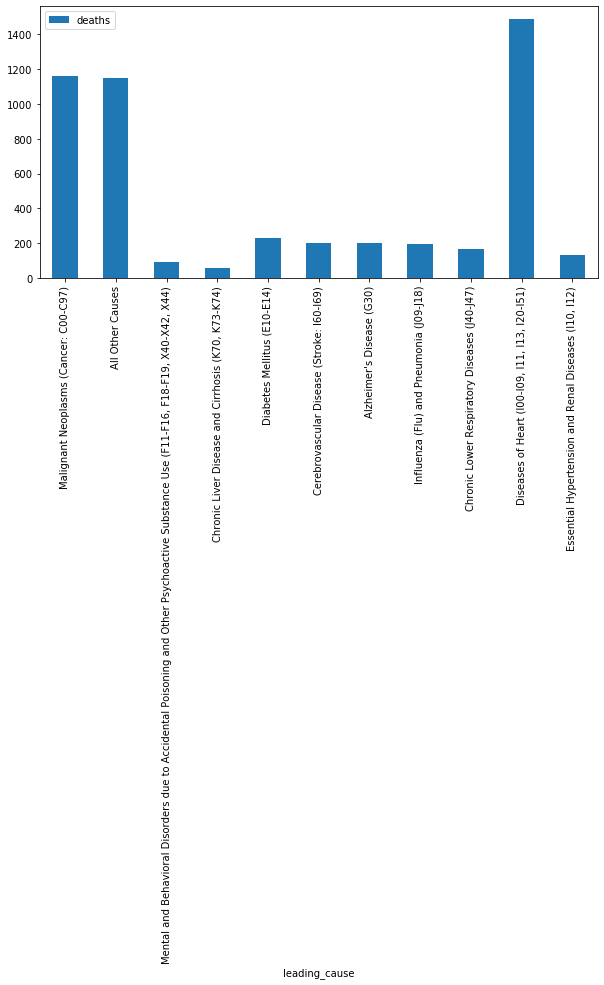

In [203]:
df_1.plot( x = 'leading_cause', y = 'deaths', kind = 'bar', figsize = (10,5))

## This is for White females

In [184]:
mask6 = female_2016['race_ethnicity'] == 'Non-Hispanic White'

#### We can see that for White females in 2016 the leading cause of death is heart disease

In [204]:
df_2 = female_2016[mask6]

In [205]:
df_2

,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
171,2016,Mental and Behavioral Disorders due to Acciden...,Female,Non-Hispanic White,138,9.8498820869,9.3751240527
148,2016,Chronic Lower Respiratory Diseases (J40-J47),Female,Non-Hispanic White,471,33.618075818,19.479202301
152,2016,Influenza (Flu) and Pneumonia (J09-J18),Female,Non-Hispanic White,450,32.119180718,17.149186714
145,2016,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",Female,Non-Hispanic White,4306,307.34487149,156.26533327
154,2016,Cerebrovascular Disease (Stroke: I60-I69),Female,Non-Hispanic White,404,28.835886689,15.15839983
155,2016,Alzheimer's Disease (G30),Female,Non-Hispanic White,361,25.766720532,11.757162066
147,2016,Malignant Neoplasms (Cancer: C00-C97),Female,Non-Hispanic White,3102,221.40821908,149.01344792
172,2016,All Other Causes,Female,Non-Hispanic White,2416,172.44431248,102.399688
157,2016,Essential Hypertension and Renal Diseases (I10...,Female,Non-Hispanic White,219,15.631334616,8.2112950139
161,2016,Diabetes Mellitus (E10-E14),Female,Non-Hispanic White,183,13.061800159,8.011416512


In [206]:
# converting the deaths into 'int' so we can plot 
df_2['deaths'] = df_2['deaths'].astype('int')

C:\Users\13476\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


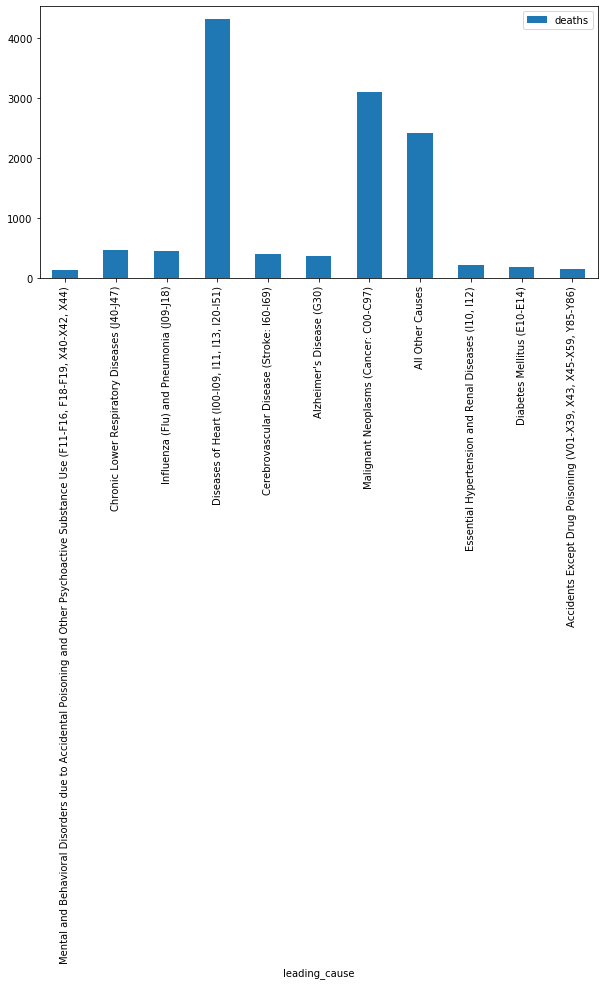

In [207]:
df_2.plot( x = 'leading_cause', y = 'deaths', kind = 'bar', figsize = (10,5))

## This is for Black females

In [186]:
mask7 = female_2016['race_ethnicity'] == 'Non-Hispanic Black'

#### We can see that Black women in 2016, the leading cause of death is heart disease

In [208]:
df_3 = female_2016[mask7]

In [209]:
df_3

,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
280,2016,Mental and Behavioral Disorders due to Acciden...,Female,Non-Hispanic Black,101,9.7151816547,8.5902035184
136,2016,Human Immunodeficiency Virus Disease (HIV: B20...,Female,Non-Hispanic Black,91,8.7532824809,7.8444021693
271,2016,Diabetes Mellitus (E10-E14),Female,Non-Hispanic Black,399,38.379777032,30.807579371
272,2016,Cerebrovascular Disease (Stroke: I60-I69),Female,Non-Hispanic Black,276,26.548417195,20.695012466
266,2016,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",Female,Non-Hispanic Black,2303,221.52537971,171.09966165
273,2016,Essential Hypertension and Renal Diseases (I10...,Female,Non-Hispanic Black,226,21.738921326,16.686833576
274,2016,Chronic Lower Respiratory Diseases (J40-J47),Female,Non-Hispanic Black,218,20.969401987,16.849136505
276,2016,Influenza (Flu) and Pneumonia (J09-J18),Female,Non-Hispanic Black,212,20.392262483,16.053811074
270,2016,Malignant Neoplasms (Cancer: C00-C97),Female,Non-Hispanic Black,1864,179.29800598,145.04080515
143,2016,All Other Causes,Female,Non-Hispanic Black,1585,152.46101904,127.83742578


In [210]:
# converting the deaths into 'int' so we can plot 
df_3['deaths'] = df_3['deaths'].astype('int')

C:\Users\13476\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


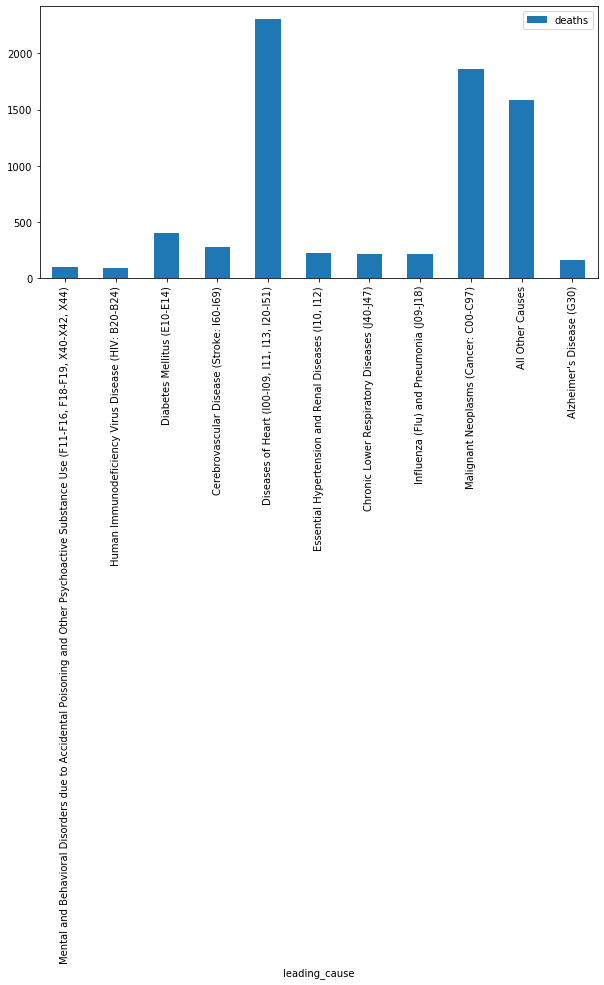

In [218]:
df_3.plot( x = 'leading_cause', y = 'deaths', kind = 'bar', figsize = (10,5))

## This is for Asian and Pacific Islander females

In [188]:
mask8 = female_2016['race_ethnicity'] == 'Asian and Pacific Islander'

#### We can see that for Asian and Pacific Islander women the leading cause of death is malignant neoplasms 

In [219]:
df_4 = female_2016[mask8]

In [220]:
df_4

,year,leading_cause,sex,race_ethnicity,deaths,death_rate,age_adjusted_death_rate
209,2016,Malignant Neoplasms (Cancer: C00-C97),Female,Asian and Pacific Islander,565,86.442985878,83.074455608
214,2016,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",Female,Asian and Pacific Islander,530,81.088110647,82.628287468
221,2016,Essential Hypertension and Renal Diseases (I10...,Female,Asian and Pacific Islander,58,8.8737932406,9.168902731
224,2016,Alzheimer's Disease (G30),Female,Asian and Pacific Islander,49,7.496825324,7.7427823549
225,2016,"Accidents Except Drug Poisoning (V01-X39, X43,...",Female,Asian and Pacific Islander,43,6.5788467129,6.5005947989
228,2016,All Other Causes,Female,Asian and Pacific Islander,385,58.903627545,60.884572245
226,2016,Chronic Lower Respiratory Diseases (J40-J47),Female,Asian and Pacific Islander,39,5.9668609721,6.1103990707
227,2016,"Intentional Self-Harm (Suicide: U03, X60-X84, ...",Female,Asian and Pacific Islander,29,4.4368966203,4.1497478057
217,2016,Cerebrovascular Disease (Stroke: I60-I69),Female,Asian and Pacific Islander,118,18.053579352,18.250674863
218,2016,Influenza (Flu) and Pneumonia (J09-J18),Female,Asian and Pacific Islander,92,14.075672037,14.459470243


In [221]:
# converting the deaths into 'int' so we can plot 
df_4['deaths'] = df_4['deaths'].astype('int')

C:\Users\13476\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


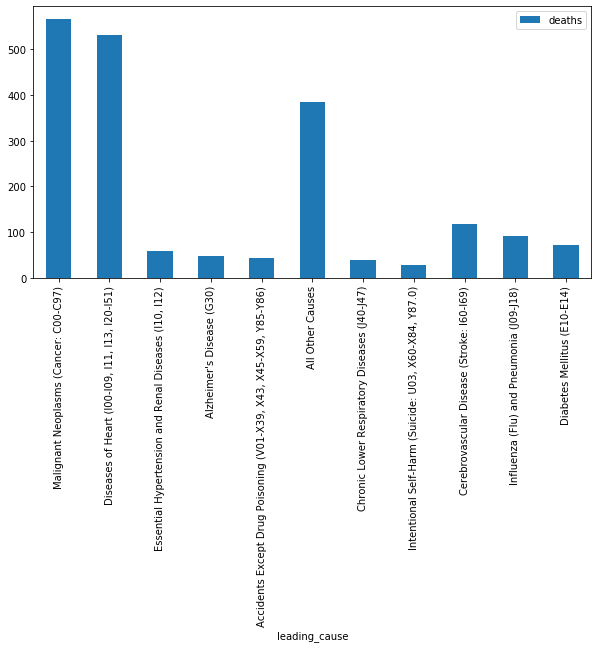

In [222]:
df_4.plot( x = 'leading_cause', y = 'deaths', kind = 'bar', figsize = (10,5))